# Dataset Information
* This data was extracted from the census bureau database found at  
http://www.census.gov/ftp/pub/DES/www/welcome.html  
* Donor: Ronny Kohavi and Barry Becker, Data Mining and Visualization, Silicon Graphics.  
* 48842 instances, mix of continuous and discrete    
* 45222 if instances with unknown values are removed 
* Duplicate or conflicting instances : 6
* Class probabilities for adult.all file
    1. Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
    2. Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                'capital-gain', 'captial-loss', 'hours-per-week', 
                'native-country', 'salary']

In [3]:
df = pd.read_csv('adult.data', header=None, names=column_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Encoding Target Variable
* <=50k : 0
* \>50k : 1

In [4]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
df['salary'] = df['salary'].apply(lambda x: x.lstrip())
df['salary'].head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: salary, dtype: object

In [6]:
df['salary'].replace({'<=50K': '0', '>50K': '1'}, inplace=True)
df['salary'] = df['salary'].astype(np.int64)

In [7]:
df['salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

## Handling Unnecessary Space of Categorical Variables

In [8]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [9]:
for feature in categorical_features:
    df[feature] = df[feature].apply(lambda x: x.lstrip().rstrip())

## Simple EDA

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,captial-loss,hours-per-week,salary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [11]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
captial-loss       int64
hours-per-week     int64
native-country    object
salary             int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  captial-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


## Checking null values

In [13]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
captial-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [14]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
captial-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

Three columns have null values : 
1. workclass
2. occupation
3. native-country

## Handling Missing Values

### 1. Workclass
* Replacing '?' with mode of Workclass of that Education group

In [15]:
workclass = df[df['workclass'].isin(['?'])]

In [16]:
index = workclass.index
education = workclass.education

In [17]:
for i in index:
    mode = df[df['education'] == education[i]]['workclass'].mode()[0]
    df.at[i, 'workclass'] = mode

In [18]:
df.workclass.isin(['?']).sum()

0

### 2. Occupation
* Replacing '?' with mode of Occupation of that Education group

In [19]:
occupation = df[df['occupation'].isin(['?'])]

In [20]:
index = occupation.index
education = occupation.education

In [21]:
for i in index:
    mode = df[df['education'] == education[i]]['occupation'].mode()[0]
    df.at[i, 'occupation'] = mode

In [22]:
df.occupation.isin(['?']).sum()

0

### 3. Native-Country
* Replacing '?' with USA as it has way more samples than any other sample

In [23]:
df['native-country'].value_counts().head()

United-States    29170
Mexico             643
?                  583
Philippines        198
Germany            137
Name: native-country, dtype: int64

In [24]:
df['native-country'].replace({'?': 'United-States'}, inplace=True)

In [25]:
df['native-country'].value_counts().head()

United-States    29753
Mexico             643
Philippines        198
Germany            137
Canada             121
Name: native-country, dtype: int64

## Splitting Variables

In [26]:
X = df.drop('salary', axis=1)
y = df['salary']

## EDA and Visualization

In [27]:
correlation = X.corr()
correlation

,age,fnlwgt,education-num,capital-gain,captial-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
captial-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


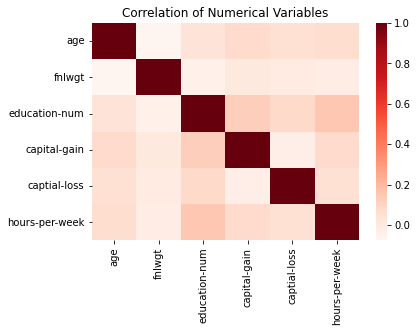

In [28]:
sns.heatmap(data=correlation, cmap='Reds')
plt.title('Correlation of Numerical Variables')
plt.show()

### Exploring Numerical Variables

In [29]:
numerical_features = [feature for feature in X.columns \
                      if X[feature].dtype == 'int64' \
                      or X[feature].dtype == 'float64']
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'captial-loss',
 'hours-per-week']

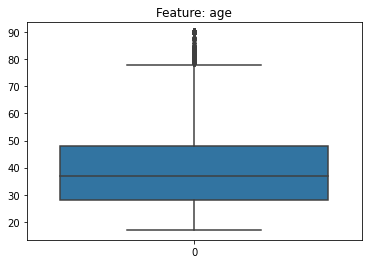

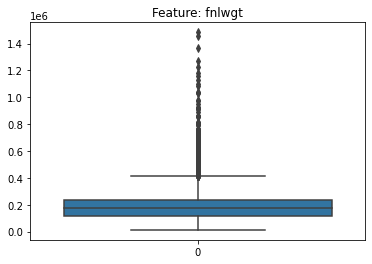

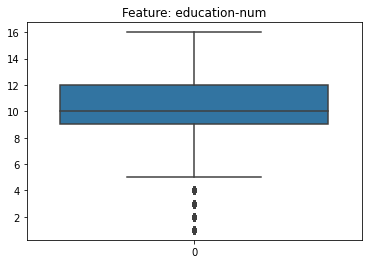

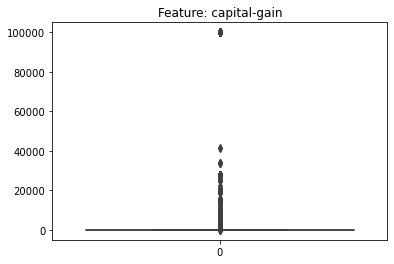

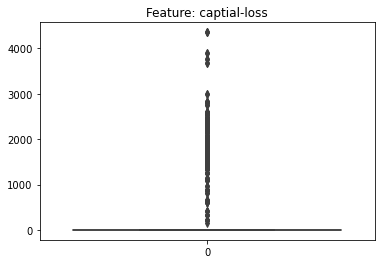

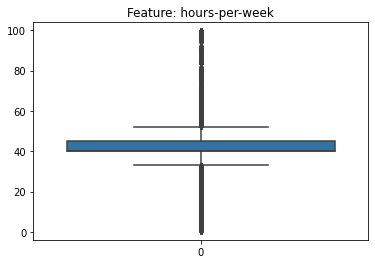

In [30]:
for feature in numerical_features:
    sns.boxplot(data=X[feature])
    plt.title('Feature: {}'.format(feature))
    plt.show()

The above data has many outliers  
We have to use scaling for better results

## Exploting categorical features

In [31]:
categorical_features = [feature for feature in X.columns if X[feature].dtype == 'object']
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

Checking how many number of categories each feature has.

In [32]:
categories = list()
for feature in categorical_features:
    cat = len(X[feature].unique())
    print('Feature: ', feature,'| Categories: ', cat)
    categories.append(cat)

Feature:  workclass | Categories:  8
Feature:  education | Categories:  16
Feature:  marital-status | Categories:  7
Feature:  occupation | Categories:  14
Feature:  relationship | Categories:  6
Feature:  race | Categories:  5
Feature:  sex | Categories:  2
Feature:  native-country | Categories:  41


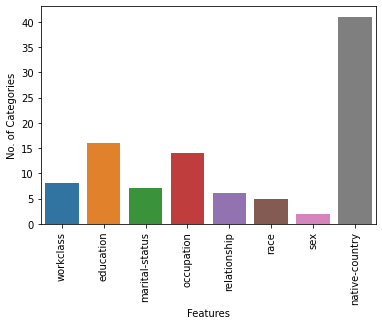

In [33]:
sns.barplot(x=categorical_features, y=categories)
plt.xlabel('Features')
plt.ylabel('No. of Categories')
plt.xticks(rotation=90)
plt.show()

## Now Features with more than 10 categories will be explored

### 1. Education
* education and education-num features are identical, so we can drop 'education'

In [34]:
X.drop('education', axis=1, inplace=True)

In [35]:
X.head(3)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States


### 2. Occupation

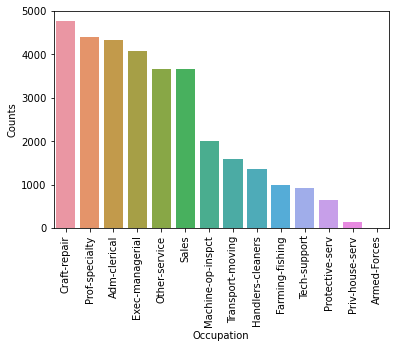

In [36]:
val_counts = X['occupation'].value_counts()
sns.barplot(x=val_counts.index, y=val_counts.values)
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

*Since each category is evenly distributed and has good amount of samples we have to compare it with the target salary*

In [37]:
def get_percentage(df):
    val = df.values[0]
    total = df.values.sum()
    perc = val/total
    return perc

In [38]:
index = val_counts.index
index

Index(['Craft-repair', 'Prof-specialty', 'Adm-clerical', 'Exec-managerial',
       'Other-service', 'Sales', 'Machine-op-inspct', 'Transport-moving',
       'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Priv-house-serv', 'Armed-Forces'],
      dtype='object')

In [39]:
join_together = list()
for i in range(len(index)):
    for j in range(i+1, len(index)):
        perc1 = get_percentage(df[df['occupation'] == index[i]]['salary'].value_counts())
        perc2 = get_percentage(df[df['occupation'] == index[j]]['salary'].value_counts())
        if abs(perc1 - perc2) < 0.02:
            join_together.append([index[i], index[j]])
join_together

[['Craft-repair', 'Transport-moving'],
 ['Adm-clerical', 'Machine-op-inspct'],
 ['Adm-clerical', 'Farming-fishing'],
 ['Adm-clerical', 'Armed-Forces'],
 ['Machine-op-inspct', 'Farming-fishing'],
 ['Machine-op-inspct', 'Armed-Forces'],
 ['Farming-fishing', 'Armed-Forces']]

#### Making groups
1. group1 : Craft-repair, Transport-moving
2. group2 : Adm-clerical, Machine-op-inspct, Farm-fishing, Armed-Forces

In [40]:
grp1 = ['Craft-repair', 'Transport-moving']
grp2 = ['Adm-clerical', 'Machine-op-inspct', 'Farm-fishing', 'Armed-Forces']
X['occupation'].replace(grp1, 'custom_group1',inplace=True)
X['occupation'].replace(grp2, 'custom_group2', inplace=True)

In [41]:
X['occupation'].value_counts()

custom_group1        6363
custom_group2        6344
Prof-specialty       4394
Exec-managerial      4066
Other-service        3654
Sales                3650
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Name: occupation, dtype: int64

### Native-Country

In [42]:
country_val_count = X['native-country'].value_counts()
country_val_count.head()

United-States    29753
Mexico             643
Philippines        198
Germany            137
Canada             121
Name: native-country, dtype: int64

In [43]:
country_val_count.values.mean()

794.170731707317

#### Since all other values are less than mean, they will be grouped togther as Other

In [44]:
other = list(country_val_count.index)
other.remove('United-States')

In [45]:
X['native-country'].replace(other, 'Other', inplace=True)

Handle all features, lets have a final check

## Final Check 

In [46]:
categorical_features = [feature for feature in X.columns if X[feature].dtype == 'object']
categories = list()
for feature in categorical_features:
    cat = len(X[feature].unique())
    print('Feature: ', feature,'| Categories: ', cat)
    categories.append(cat)

Feature:  workclass | Categories:  8
Feature:  marital-status | Categories:  7
Feature:  occupation | Categories:  11
Feature:  relationship | Categories:  6
Feature:  race | Categories:  5
Feature:  sex | Categories:  2
Feature:  native-country | Categories:  2


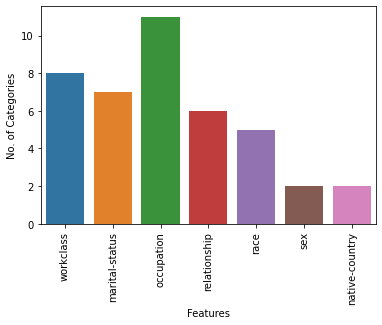

In [47]:
sns.barplot(x=categorical_features, y=categories)
plt.xlabel('Features')
plt.ylabel('No. of Categories')
plt.xticks(rotation=90)
plt.show()

Ended Exploratory Data Analysis & Feature Engineering

# Model Development

In [48]:
X.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country
0,39,State-gov,77516,13,Never-married,custom_group2,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other


In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## Using Robust Scaler & Random Forest

In [51]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [52]:
encoder = OneHotEncoder(handle_unknown='ignore')
robust = RobustScaler(with_centering=False)
rfc = RandomForestClassifier()

In [53]:
encoder.fit(X)
X_train_encoded = encoder.transform(X_train)
X_train_scaled = robust.fit_transform(X_train_encoded)

In [54]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [55]:
y_pred = rfc.predict(X_train_scaled)

### Evaluation

In [56]:
from sklearn.metrics import confusion_matrix, f1_score

In [57]:
f1_score(y_train, y_pred)

0.9999095268252963

In [58]:
confusion_matrix(y_train, y_pred)

array([[17265,     0],
       [    1,  5526]], dtype=int64)

## Creating Pipeline

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
pipeline = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore')), ('scaler', RobustScaler(with_centering=False)),
                    ('forest', RandomForestClassifier())])

In [61]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('scaler', RobustScaler(with_centering=False)),
                ('forest', RandomForestClassifier())])

In [62]:
pipeline.score(X_train, y_train)

1.0

In [63]:
y_pred = pipeline.predict(X_train)

In [64]:
f1_score(y_train, y_pred)

1.0

In [65]:
confusion_matrix(y_train, y_pred)

array([[17265,     0],
       [    0,  5527]], dtype=int64)

## Testing on Test Data

In [66]:
y_pred = pipeline.predict(X_test)

In [67]:
f1_score(y_test, y_pred)

0.6387851630570077

In [68]:
confusion_matrix(y_test, y_pred)

array([[7035,  420],
       [1031, 1283]], dtype=int64)

The model is overfitting

## Undersampling

In [69]:
df = pd.concat([X_train, y_train], axis=1)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,salary
19749,34,Self-emp-not-inc,56460,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States,0
1216,48,Self-emp-not-inc,243631,10,Married-civ-spouse,custom_group1,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States,1
27962,23,State-gov,56402,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,0
23077,56,Local-gov,255406,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0
10180,17,Private,297246,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,Private,359461,13,Married-civ-spouse,custom_group1,Husband,White,Male,0,0,40,United-States,0
5390,31,Private,147215,8,Divorced,Other-service,Unmarried,White,Female,0,0,21,United-States,0
860,18,Private,216284,7,Never-married,custom_group2,Own-child,White,Female,0,0,20,United-States,0
15795,50,Self-emp-not-inc,54261,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,84,United-States,0


In [70]:
def get_undersample_set(df, num):
    more_than_50 = df[df['salary']==1]
    less_than_50 = df[df['salary']==0].sample(n=num, random_state=42)
    train_df = pd.concat([more_than_50, less_than_50])
    train_df = train_df.sample(frac=1)
    X_train_us = train_df.drop('salary', axis=1)
    y_train_us = train_df['salary']
    return (X_train_us, y_train_us)

### Pipeline for Undersampled Data

In [71]:
pipeline_us = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore')), ('scaler', RobustScaler(with_centering=False)),
                    ('forest', RandomForestClassifier())])

In [72]:
scores = {}

In [73]:
samples = [5527, 6500, 7500, 8500, 9500, 10500]

### Getting Scores

In [74]:
# Loop for getting scores
for num in samples:
    X_train_us, y_train_us = get_undersample_set(df, num)
    pipeline_us.fit(X_train_us, y_train_us)
    y_pred = pipeline_us.predict(X_test)
    scores[str(num)] = f1_score(y_test, y_pred)

In [75]:
scores

{'5527': 0.6638683680322365,
 '6500': 0.6782670454545455,
 '7500': 0.6823617339312407,
 '8500': 0.6864970645792563,
 '9500': 0.6887390149192725,
 '10500': 0.6809231420707177}

### Plotting Graph

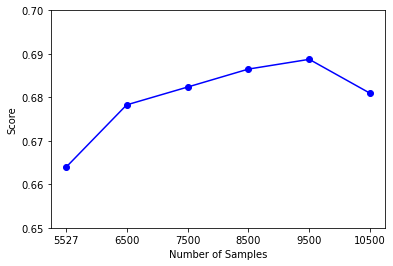

In [76]:
samples = list(scores.keys())
list_scores = list(scores.values())
plt.plot(samples, list_scores, 'b-o')
plt.xlabel('Number of Samples')
plt.ylabel('Score')
plt.ylim(0.65, 0.7)
plt.xticks(rotation=0)
plt.show()

In [77]:
print('Best Accuracy: \n\t',max(scores), 'samples ->', scores[max(scores)])

Best Accuracy: 
	 9500 samples -> 0.6887390149192725


# Conclusion
Under sampling did increase the accuracy of the model a little but after reaching 9500 samples the accuracy of the model started declining.

## Creating Pipeline for Undersampled using Standard Scaler

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
pipeline_us_st = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore')), ('scaler', StandardScaler(with_mean=False)),
                    ('forest', RandomForestClassifier())])

In [80]:
X_train_us, y_train_us = get_undersample_set(df, 9500)

In [81]:
pipeline_us_st.fit(X_train_us, y_train_us)

Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('scaler', StandardScaler(with_mean=False)),
                ('forest', RandomForestClassifier())])

### Checking with test data

In [82]:
y_pred = pipeline_us_st.predict(X_test)

In [83]:
confusion_matrix(y_test, y_pred)

array([[6603,  852],
       [ 640, 1674]], dtype=int64)

In [84]:
f1_score(y_test, y_pred)

0.6917355371900827